In [ ]:
# 1: Importing Required Libraries

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import networkx as nx
import pylab as pl

In [ ]:
# 2: Create the Graph

edges = [(0,1),(1,2),(1,3),(1,5),(5,6),(5,4),(9,10),(2,4),(0,6),(6,7),(8,9),(7,8),(1,7),(3,9),(10,8),
         (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 0), (1, 5), (6, 4), (3, 4)]

G = nx.Graph()
G.add_edges_from(edges)

In [ ]:
# 3: Define Goal State

Matrix_size = 11  # Number of nodes
goal = 10         # Goal node

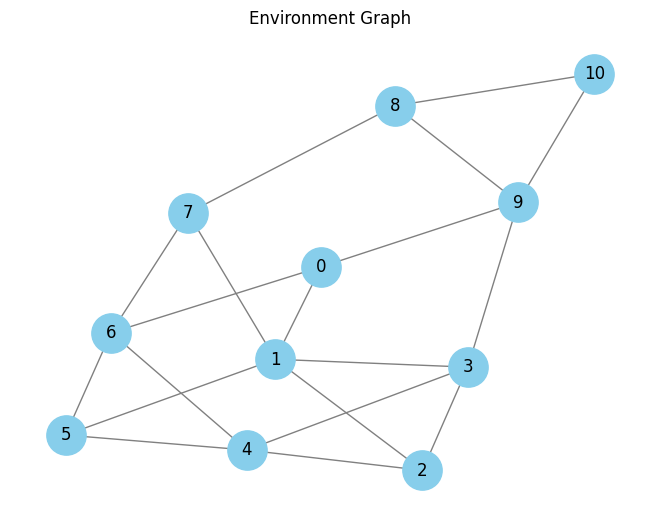

In [ ]:
# 4: Visualize the Graph

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=800, edge_color='gray')
plt.title("Environment Graph")
plt.show()

In [ ]:
# 5: Create Reward Matrix
R = np.matrix(np.ones((Matrix_size, Matrix_size)) * -1)

for edge in edges:
    if edge[1] == goal:
        R[edge] = 100
    else:
        R[edge] = 0

    if edge[0] == goal:
        R[edge[::-1]] = 100
    else:
        R[edge[::-1]] = 0

R[goal, goal] = 100  # Reward for reaching goal

In [ ]:
# 6: Initialize Q-Table

Q = np.matrix(np.zeros((Matrix_size, Matrix_size)))

In [ ]:
# 7: Define Helper Functions

def available_actions(state):
    return np.where(R[state, :] >= 0)[1]

def select_next_state(available_actions):
    return int(np.random.choice(available_actions, 1))

def update_Q(current_state, action, gamma=0.8):
    next_state = action
    max_index = np.where(Q[next_state, :] == np.max(Q[next_state, :]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, 1))
    else:
        max_index = int(max_index)

    max_value = Q[next_state, max_index]
    Q[current_state, next_state] = R[current_state, next_state] + gamma * max_value

    if np.max(Q) > 0:
        return np.sum(Q / np.max(Q) * 100)
    else:
        return 0

In [ ]:
# 8: Train the Agent using Q-Learning
score = []
epochs = 1000
for i in range(epochs):
    current_state = np.random.randint(0, Matrix_size)
    available_act = available_actions(current_state)
    action = select_next_state(available_act)
    score.append(update_Q(current_state, action))

<ipython-input-12-2a5041c4bf58>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(np.random.choice(available_actions, 1))
<ipython-input-12-2a5041c4bf58>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, 1))
<ipython-input-12-2a5041c4bf58>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(max_index)


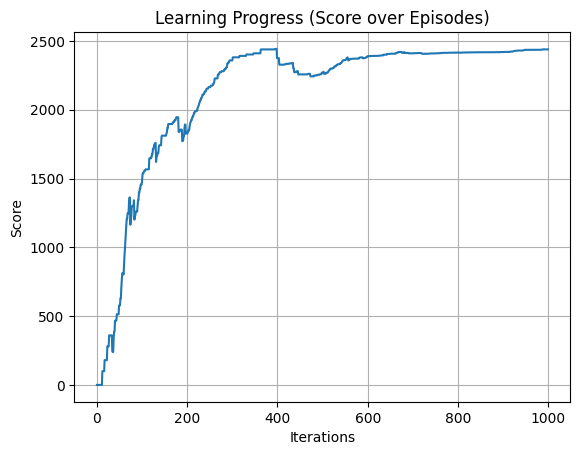

In [ ]:
# 9: Plot the Learning Progress

plt.plot(score)
plt.title("Learning Progress (Score over Episodes)")
plt.xlabel("Iterations")
plt.ylabel("Score")
plt.grid(True)
plt.show()

In [ ]:
# 10: Extract the Optimal Path
def get_optimal_path(start_state, goal_state):
    current_state = start_state
    path = [current_state]

    while current_state != goal_state:
        next_step = np.where(Q[current_state, :] == np.max(Q[current_state, :]))[1]

        if next_step.shape[0] > 1:
            next_step = int(np.random.choice(next_step, 1))
        else:
            next_step = int(next_step)

        path.append(next_step)
        current_state = next_step

    return path

In [ ]:
# 11: Test the Agent

initial_state = random.randint(0, 10)  # Change this to test from other nodes
optimal_path = get_optimal_path(initial_state, goal)
print(f"Shortest path from {initial_state} to {goal} using Q-learning: {optimal_path}")

Shortest path from 1 to 10 using Q-learning: [1, 3, 9, 10]


<ipython-input-15-c21c65bea689>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_step = int(next_step)
